In [316]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import keras
from keras.preprocessing import image
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt     
from pycm import *


In [317]:
#import splitfolders
#splitfolders.ratio('Test', output="output", seed=1337, ratio=(0.5,0.5)) 

In [318]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False)

In [319]:
#Add new layers
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x)

In [320]:
model=keras.Model(inputs=base_model.input,outputs=preds)
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                   

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, None, None, 512)  4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_9 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_9

In [321]:
# Assign Trainable layers and freeze layer -> ลองเปลี่ยน ช่วง layer ในการ trainable True/False 3 ค่า เพื่อดูความแตกต่างของผลลัพธ์ที่ได้
for layer in model.layers[:10]:
    layer.trainable=False
for layer in model.layers[10:]:
    layer.trainable=True

In [322]:
#Create DataGeneartor Object
datagen=ImageDataGenerator( rescale=1./255,
rotation_range=30, zoom_range=0.5,
width_shift_range=0.2, height_shift_range=0.2,
shear_range=0.15, horizontal_flip=True,
fill_mode="nearest")

In [323]:
# Create Train Image generator
train_generator = datagen.flow_from_directory(
    directory="./train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=10,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 97 images belonging to 3 classes.


In [324]:
# Create Validation Image generator
val_generator=datagen.flow_from_directory("./validate/", # this is where you specify the path to the main data folder
target_size=(224,224), color_mode='rgb',
batch_size=7,
class_mode="categorical", seed = 42,
shuffle=True)

Found 69 images belonging to 3 classes.


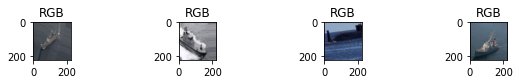

In [325]:
batch = train_generator.next()
Img_train = (batch[0]*255)
plt.figure(figsize=(10,4))
for i in range(1,5):
    plt.subplot(5,4,i)
    plt.imshow(Img_train[i-1].astype("uint8"))
    plt.title('RGB')

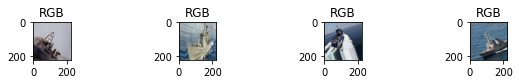

In [326]:
batch = val_generator.next()
Img_train = (batch[0]*255)
plt.figure(figsize=(10,4))
for i in range(1,5):
    plt.subplot(5,4,i)
    plt.imshow(Img_train[i-1].astype("uint8"))
    plt.title('RGB')

In [344]:
# Assign Trainable layers and freeze layer -> ลองเปลี่ยน ช่วง layer ในการ trainable True/False 3 ค่า เพื่อดูความแตกต่างของผลลัพธ์ที่ได้
for layer in model.layers[:10]:
    layer.trainable=False
for layer in model.layers[10:]:
    layer.trainable=True

In [355]:
# Assign Trainable layers and freeze layer -> ลองเปลี่ยน ช่วง layer ในการ trainable True/False 3 ค่า เพื่อดูความแตกต่างของผลลัพธ์ที่ได้
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [350]:
# Assign Trainable layers and freeze layer -> ลองเปลี่ยน ช่วง layer ในการ trainable True/False 3 ค่า เพื่อดูความแตกต่างของผลลัพธ์ที่ได้
for layer in model.layers[:30]:
    layer.trainable=False
for layer in model.layers[30:]:
    layer.trainable=True

In [356]:
#Create Optimizer
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [357]:
# Define training Generator Parameter
EP = 20 # Number of Epoches
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not adjust batch_size to make it equal
print(f"step_size_train = {step_size_train} step_size_val = {step_size_val}")

step_size_train = 9 step_size_val = 9


In [358]:
history=model.fit_generator(generator=train_generator,
    steps_per_epoch=step_size_train,
    validation_data = val_generator,
    validation_steps = step_size_val,
    epochs=EP,
    verbose = 1)

C:\Users\ryu\AppData\Local\Temp\ipykernel_24040\2098572540.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/20
9/9 [==============================] - 5s 449ms/step - loss: 0.5156 - accuracy: 0.9310 - val_loss: 8.8726 - val_accuracy: 0.4921
Epoch 2/20
9/9 [==============================] - 4s 397ms/step - loss: 0.5876 - accuracy: 0.8621 - val_loss: 12.0246 - val_accuracy: 0.3333
Epoch 3/20
9/9 [==============================] - 4s 397ms/step - loss: 0.2878 - accuracy: 0.9310 - val_loss: 15.6560 - val_accuracy: 0.3016
Epoch 4/20
9/9 [==============================] - 4s 413ms/step - loss: 0.3775 - accuracy: 0.8506 - val_loss: 10.5646 - val_accuracy: 0.3333
Epoch 5/20
9/9 [==============================] - 4s 410ms/step - loss: 0.5278 - accuracy: 0.8506 - val_loss: 2.2141 - val_accuracy: 0.5714
Epoch 6/20
9/9 [==============================] - 4s 407ms/step - loss: 0.2098 - accuracy: 0.9080 - val_loss: 3.5826 - val_accuracy: 0.5397
Epoch 7/20
9/9 [==============================] - 4s 399ms/step - loss: 0.2212 - accuracy: 0.9310 - val_loss: 12.8373 - val_accuracy: 0.4127
Epoch 8/20
9/9 [

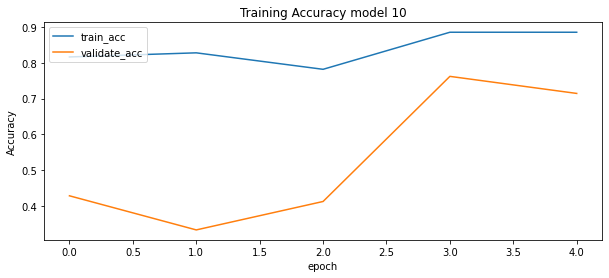

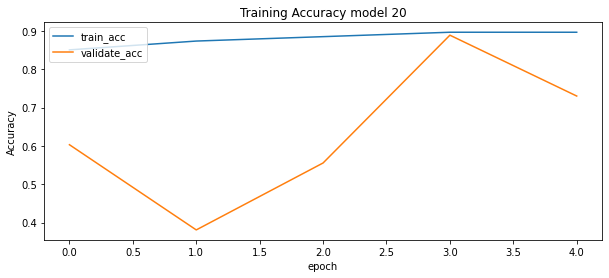

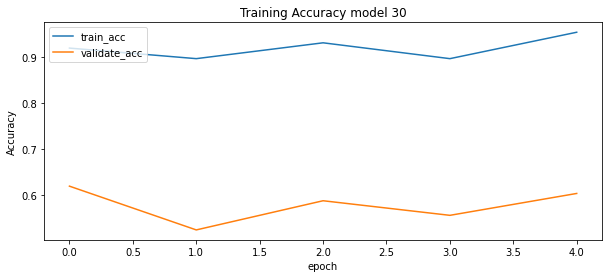

In [353]:
# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(10,4))
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Training Accuracy model 10')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validate_acc'], loc='upper left')

plt.figure(figsize=(10,4))
plt.plot(history2.history["accuracy"], label="Train_acc")
plt.plot(history2.history["val_accuracy"], label="Validate_acc")
plt.title('Training Accuracy model 20')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validate_acc'], loc='upper left')

plt.figure(figsize=(10,4))
plt.plot(history3.history["accuracy"], label="Train_acc")
plt.plot(history3.history["val_accuracy"], label="Validate_acc")
plt.title('Training Accuracy model 30')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validate_acc'], loc='upper left')

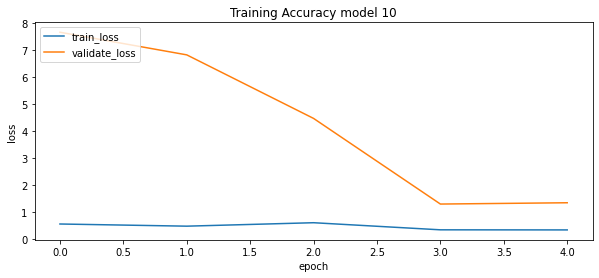

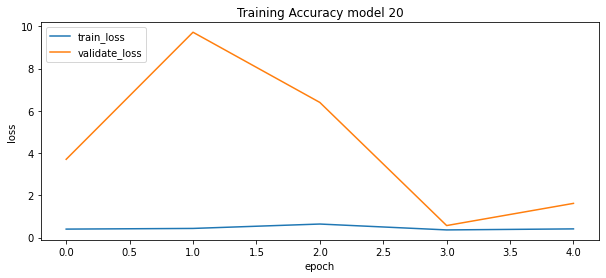

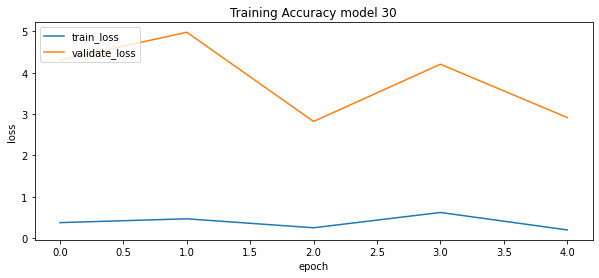

In [354]:
# View Loss (Training, Validation)
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Training Accuracy model 10')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validate_loss'], loc='upper left')

plt.figure(figsize=(10,4))
plt.plot(history2.history['loss'], label="Train_loss")
plt.plot(history2.history['val_loss'], label="Validate_loss")
plt.title('Training Accuracy model 20')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validate_loss'], loc='upper left')

plt.figure(figsize=(10,4))
plt.plot(history3.history['loss'], label="Train_loss")
plt.plot(history3.history['val_loss'], label="Validate_loss")
plt.title('Training Accuracy model 30')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validate_loss'], loc='upper left')

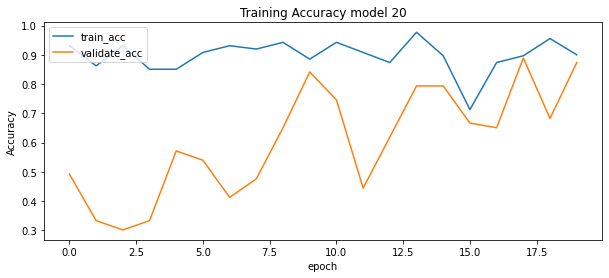

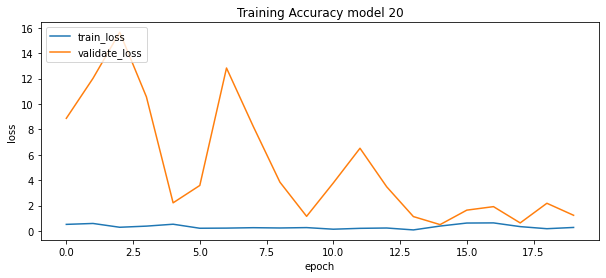

In [360]:
plt.figure(figsize=(10,4))
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Training Accuracy model 20')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validate_acc'], loc='upper left')

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Training Accuracy model 20')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validate_loss'], loc='upper left')

In [361]:
# Initial test generator
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
"./test/",
class_mode="categorical",
target_size=(224, 224), color_mode="rgb",
shuffle=False, seed=42,
batch_size=1)

Found 15 images belonging to 3 classes.


In [362]:
#Get class id for y_real_class
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

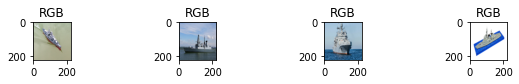

In [363]:
plt.figure(figsize=(10,4))
for i in range(1,5):
    batch = test_generator.next()
    Img_train = (batch[0]*255)
    plt.subplot(5,4,i)
    plt.imshow(Img_train[0].astype("uint8"))
    plt.title('RGB')

In [364]:
#predict 1 image at a time for total predict images = len(y_true) # number of real class
test_generator.reset()
pred_prob = []
pred=model.predict_generator(test_generator)
for i in range(len(y_true)):
    pred_prob.append(np.array(pred[i]))

C:\Users\ryu\AppData\Local\Temp\ipykernel_24040\2625963933.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator)


In [365]:
test_generator.class_indices

{'battle ship': 0, 'patrol ship': 1, 'submarine': 2}

In [366]:
#Get classID from max prob(pred_prob)
df_pred = pd.DataFrame(pred_prob)
df_pred

,0,1,2
0,7.481904e-02,9.208725e-01,0.004308
1,9.962741e-01,3.483249e-04,0.003378
2,8.424763e-01,1.463128e-02,0.142892
3,2.208489e-03,7.930121e-07,0.997791
4,2.903007e-03,9.967250e-01,0.000372
5,2.737232e-02,4.272997e-01,0.545328
6,1.399163e-04,2.129388e-05,0.999839
7,9.897789e-02,7.800541e-01,0.120968
8,3.950543e-04,9.995841e-01,0.000021
9,3.440344e-03,9.962088e-01,0.000351


In [367]:
df_class = df_pred.idxmax(axis=1)
df_class

0     1
1     0
2     0
3     2
4     1
5     2
6     2
7     1
8     1
9     1
10    2
11    2
12    2
13    1
14    2
dtype: int64

In [368]:
def getList(dict):
    return dict.keys()

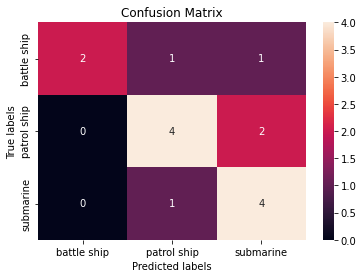

In [369]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_true, df_class), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(getList(test_generator.class_indices)); ax.yaxis.set_ticklabels(getList(test_generator.class_indices));

In [370]:
print(classification_report(y_true, df_class))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.67      0.67      0.67         6
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.66      0.67        15
weighted avg       0.72      0.67      0.67        15



In [271]:
#import splitfolders
#splitfolders.ratio('output/Tester', output="output", seed=1337, ratio=(0.5,0.5)) 

In [272]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False)

In [273]:
#Add new layers
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(131,activation='softmax')(x)

In [274]:
model=keras.Model(inputs=base_model.input,outputs=preds)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                   

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, None, None, 512)  4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_9 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_9

In [275]:
# Assign Trainable layers and freeze layer -> ลองเปลี่ยน ช่วง layer ในการ trainable True/False 3 ค่า เพื่อดูความแตกต่างของผลลัพธ์ที่ได้
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [276]:
#Create DataGeneartor Object
datagen=ImageDataGenerator( rescale=1./255,
rotation_range=30, zoom_range=0.5,
width_shift_range=0.2, height_shift_range=0.2,
shear_range=0.15, horizontal_flip=True,
fill_mode="nearest")

In [277]:
# Create Train Image generator
train_generator = datagen.flow_from_directory(
    directory="./output/train/",
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=131,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 67692 images belonging to 131 classes.


In [278]:
# Create Validation Image generator
val_generator=datagen.flow_from_directory("./output/validate/", # this is where you specify the path to the main data folder
target_size=(100,100), color_mode='rgb',
batch_size=22,
class_mode="categorical", seed = 42,
shuffle=True)

Found 11353 images belonging to 131 classes.


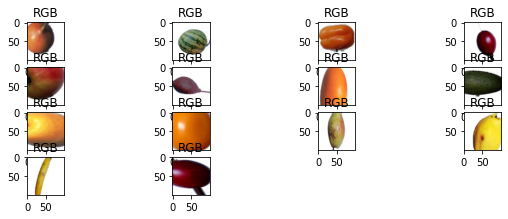

In [279]:
batch = train_generator.next()
Img_train = (batch[0]*255)
plt.figure(figsize=(10,4))
for i in range(1,15):
    plt.subplot(5,4,i)
    plt.imshow(Img_train[i-1].astype("uint8"))
    plt.title('RGB')

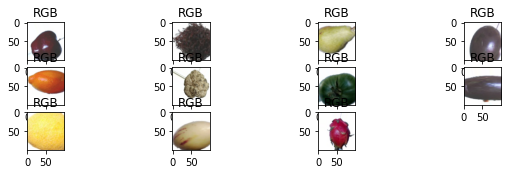

In [280]:
batch = val_generator.next()
Img_train = (batch[0]*255)
plt.figure(figsize=(10,4))
for i in range(1,12):
    plt.subplot(5,4,i)
    plt.imshow(Img_train[i-1].astype("uint8"))
    plt.title('RGB')

In [281]:
#Create Optimizer
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [282]:
# Define training Generator Parameter
EP = 5 # Number of Epoches
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not adjust batch_size to make it equal
print(f"step_size_train = {step_size_train} step_size_val = {step_size_val}")

step_size_train = 516 step_size_val = 516


In [283]:
history=model.fit_generator(generator=train_generator,
    steps_per_epoch=step_size_train,
    validation_data = val_generator,
    validation_steps = step_size_val,
    epochs=EP,
    verbose = 1)

C:\Users\ryu\AppData\Local\Temp\ipykernel_24040\2098572540.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/5
516/516 [==============================] - 484s 935ms/step - loss: 0.4824 - accuracy: 0.8701 - val_loss: 2.0805 - val_accuracy: 0.5485
Epoch 2/5
516/516 [==============================] - 477s 924ms/step - loss: 0.1309 - accuracy: 0.9633 - val_loss: 0.5684 - val_accuracy: 0.8618
Epoch 3/5
516/516 [==============================] - 443s 857ms/step - loss: 0.1059 - accuracy: 0.9721 - val_loss: 0.3797 - val_accuracy: 0.9035
Epoch 4/5
516/516 [==============================] - 441s 854ms/step - loss: 0.0865 - accuracy: 0.9782 - val_loss: 0.4702 - val_accuracy: 0.8822
Epoch 5/5
516/516 [==============================] - 442s 856ms/step - loss: 0.0880 - accuracy: 0.9778 - val_loss: 0.5081 - val_accuracy: 0.8746


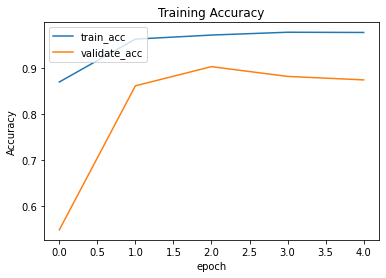

In [284]:
# Performance Visualization
# View Accuracy (Training, Validation)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validate_acc'], loc='upper left')

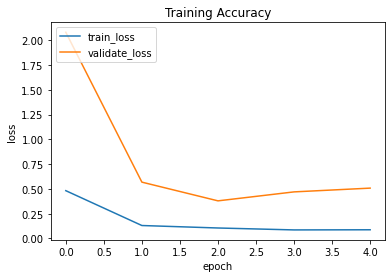

In [285]:
# View Loss (Training, Validation)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Training Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validate_loss'], loc='upper left')

In [286]:
# Initial test generator
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
"./output/test/",
class_mode="categorical",
target_size=(100, 100), color_mode="rgb",
shuffle=False, seed=42,
batch_size=5)

Found 11335 images belonging to 131 classes.


In [287]:
#Get class id for y_real_class
y_true = test_generator.classes
y_true

array([  0,   0,   0, ..., 130, 130, 130])

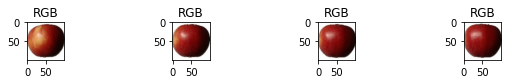

In [288]:
plt.figure(figsize=(10,4))
for i in range(1,5):
    batch = test_generator.next()
    Img_train = (batch[0]*255)
    plt.subplot(5,4,i)
    plt.imshow(Img_train[0].astype("uint8"))
    plt.title('RGB')

In [289]:
#predict 1 image at a time for total predict images = len(y_true) # number of real class
test_generator.reset()
pred_prob = []
pred=model.predict_generator(test_generator)
for i in range(len(y_true)):
    pred_prob.append(np.array(pred[i]))

C:\Users\ryu\AppData\Local\Temp\ipykernel_24040\2625963933.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator)


In [290]:
#Get classID from max prob(pred_prob)
df_pred = pd.DataFrame(pred_prob)
df_pred

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,7.976856e-01,1.172817e-03,1.363808e-06,4.168535e-06,5.995755e-06,2.073678e-05,2.129244e-04,3.331153e-04,3.517579e-03,2.079505e-03,...,1.317254e-05,2.595449e-05,1.816514e-05,1.105541e-05,2.669392e-04,1.109021e-06,8.710293e-07,1.391111e-07,1.107066e-06,2.229421e-07
1,7.816460e-01,6.498016e-03,2.678604e-06,1.227355e-05,2.068826e-05,6.616431e-05,5.762339e-04,9.616399e-04,4.704883e-03,7.030068e-03,...,2.065991e-05,7.578298e-05,4.996058e-05,2.112934e-05,8.226741e-04,2.225727e-06,2.353412e-06,5.591069e-07,3.762312e-06,8.227883e-07
2,6.321375e-01,2.167461e-02,6.077029e-06,3.377156e-05,5.847057e-05,2.150216e-04,1.567177e-03,1.782141e-03,7.079340e-03,1.743655e-02,...,5.736683e-05,2.321007e-04,1.310369e-04,5.055098e-05,2.128635e-03,7.172430e-06,8.511690e-06,1.986874e-06,8.973630e-06,2.992253e-06
3,6.137831e-01,8.387268e-03,2.900317e-06,1.545571e-05,2.249713e-05,7.941663e-05,6.283086e-04,1.009350e-03,4.485217e-03,8.248201e-03,...,3.133504e-05,9.788592e-05,6.862116e-05,2.997399e-05,1.025620e-03,2.990192e-06,4.057282e-06,6.910590e-07,3.906612e-06,1.143823e-06
4,8.188034e-01,1.187349e-02,1.327876e-06,9.467550e-06,1.755211e-05,6.425205e-05,8.501448e-04,9.678960e-04,4.387314e-03,6.807959e-03,...,1.624481e-05,7.021874e-05,4.782865e-05,1.529525e-05,1.030908e-03,1.756534e-06,1.666001e-06,5.040696e-07,2.857168e-06,5.538487e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,3.709789e-13,2.172137e-14,2.386855e-10,5.710046e-12,4.867443e-12,3.232490e-10,4.952396e-13,1.788453e-17,5.123418e-14,7.784773e-15,...,3.781497e-15,9.430461e-13,6.748429e-14,1.107883e-15,3.511909e-13,3.823565e-14,1.682514e-10,1.030091e-08,2.636541e-13,9.999999e-01
11331,6.213356e-13,3.993099e-14,3.279132e-10,9.519672e-12,7.561682e-12,4.591289e-10,8.538453e-13,3.648730e-17,8.730817e-14,1.331138e-14,...,6.876435e-15,1.518699e-12,1.170445e-13,2.194381e-15,5.511704e-13,6.719363e-14,2.792369e-10,1.370785e-08,4.210972e-13,9.999999e-01
11332,1.955750e-13,1.111045e-14,1.562686e-10,3.627360e-12,2.891476e-12,1.959920e-10,2.710095e-13,8.443545e-18,2.925629e-14,4.146798e-15,...,2.119796e-15,5.503133e-13,3.740111e-14,6.005515e-16,1.740186e-13,2.037112e-14,1.133973e-10,6.478762e-09,1.549337e-13,1.000000e+00
11333,7.383002e-14,3.773097e-15,8.143745e-11,1.633595e-12,1.386364e-12,1.075885e-10,1.055195e-13,2.314394e-18,1.132639e-14,1.568983e-15,...,7.494026e-16,2.221975e-13,1.461612e-14,1.872955e-16,7.173643e-14,7.514756e-15,5.159584e-11,3.596386e-09,6.764680e-14,1.000000e+00


In [291]:
df_class = df_pred.idxmax(axis=1)
df_class

0          0
1          0
2          0
3          0
4          0
        ... 
11330    130
11331    130
11332    130
11333    130
11334    130
Length: 11335, dtype: int64

In [305]:
print(test_generator.class_indices)
new_dict = dict([(value, key) for key, value in test_generator.class_indices.items()])

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

In [297]:
print(len(getList(test_generator.class_indices)))

131


In [301]:
cm3 = ConfusionMatrix(y_true, list(df_class))

In [314]:
cm3.relabel(mapping=new_dict)
cm3.save_html("newCsv")

{'Status': True,
 'Message': 'C:\\Users\\ryu\\Documents\\GitHub\\ImageProcessing\\Lab10\\newCsv.html'}

In [308]:
print(classification_report(y_true, df_class))

              precision    recall  f1-score   support

           0       0.78      0.35      0.49        82
           1       0.54      1.00      0.70        74
           2       1.00      0.53      0.69        80
           3       1.00      0.96      0.98        82
           4       1.00      0.41      0.58        80
           5       1.00      0.62      0.77        82
           6       0.93      0.83      0.88        76
           7       1.00      0.32      0.48        82
           8       0.00      0.00      0.00        82
           9       0.63      0.93      0.75        72
          10       0.90      1.00      0.95        83
          11       1.00      0.15      0.26        82
          12       0.50      1.00      0.67       109
          13       1.00      0.61      0.76        82
          14       1.00      1.00      1.00        71
          15       0.94      1.00      0.97        83
          16       1.00      0.82      0.90        83
          17       1.00    

C:\Users\ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif